In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [100]:
pd.set_option('display.max_columns', None)

In [101]:
training_set_feature=pd.read_csv("training_set_features.csv")
training_set_feature.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [102]:
training_set_feature.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [103]:
pd.set_option('display.max_info_columns', 1000)
training_set_feature.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [104]:
training_set_feature.duplicated().sum()

0

In [105]:
categorical_set_feature=training_set_feature.select_dtypes(include='object').columns.tolist()
numerical_set_feature=training_set_feature.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [106]:
for col in numerical_set_feature:
    missing_values=training_set_feature[col].isnull().sum()
    percentage = np.round((missing_values / len(training_set_feature[col])) * 100, 2)
    print(f"Column '{col}' has {missing_values} missing values, which is approximately {percentage}% of the total.")

Column 'respondent_id' has 0 missing values, which is approximately 0.0% of the total.
Column 'h1n1_concern' has 92 missing values, which is approximately 0.34% of the total.
Column 'h1n1_knowledge' has 116 missing values, which is approximately 0.43% of the total.
Column 'behavioral_antiviral_meds' has 71 missing values, which is approximately 0.27% of the total.
Column 'behavioral_avoidance' has 208 missing values, which is approximately 0.78% of the total.
Column 'behavioral_face_mask' has 19 missing values, which is approximately 0.07% of the total.
Column 'behavioral_wash_hands' has 42 missing values, which is approximately 0.16% of the total.
Column 'behavioral_large_gatherings' has 87 missing values, which is approximately 0.33% of the total.
Column 'behavioral_outside_home' has 82 missing values, which is approximately 0.31% of the total.
Column 'behavioral_touch_face' has 128 missing values, which is approximately 0.48% of the total.
Column 'doctor_recc_h1n1' has 2160 missing 

In [107]:
# checking skewness of training_set_feature
from scipy.stats import  skew
for col in numerical_set_feature:
    skewness=skew(training_set_feature[col].dropna())
    print(f'Skewness for {col}: {skewness}')


Skewness for respondent_id: 0.0
Skewness for h1n1_concern: -0.1599043058276464
Skewness for h1n1_knowledge: -0.23921063457834768
Skewness for behavioral_antiviral_meds: 4.186267289807948
Skewness for behavioral_avoidance: -1.011248988444159
Skewness for behavioral_face_mask: 3.4015529926907364
Skewness for behavioral_wash_hands: -1.716283259003264
Skewness for behavioral_large_gatherings: 0.5894891724720178
Skewness for behavioral_outside_home: 0.6881885484892614
Skewness for behavioral_touch_face: -0.7583118701406183
Skewness for doctor_recc_h1n1: 1.349659464269889
Skewness for doctor_recc_seasonal: 0.7243528552357099
Skewness for chronic_med_condition: 0.9620411289425498
Skewness for child_under_6_months: 3.0328319678031384
Skewness for health_worker: 2.4619446811838706
Skewness for health_insurance: -2.33466599385128
Skewness for opinion_h1n1_vacc_effective: -0.902654250594422
Skewness for opinion_h1n1_risk: 0.6729182034315186
Skewness for opinion_h1n1_sick_from_vacc: 0.651243418564

In [122]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

columns_to_remove = []

for col in numerical_set_feature:
    missing_percent = np.round(training_set_feature[col].isnull().sum() / len(training_set_feature[col]), 2)
    
    if missing_percent > 0.4:
        columns_to_remove.append(col)
        numerical_set_feature.remove(col)
    else:
        training_set_feature[col] = imputer.fit_transform(training_set_feature[[col]])

training_set_feature.drop(columns=columns_to_remove, inplace=True)
print(f"Columns removed due to high percentage of missing values: {columns_to_remove}")


Columns removed due to high percentage of missing values: []


In [123]:
training_set_feature['opinion_h1n1_vacc_effective'].isnull().sum()

0

In [110]:
for col in categorical_set_feature:
    missing_values = training_set_feature[col].isnull().sum()
    percentage = np.round((missing_values / len(training_set_feature[col])) * 100, 2)
    print(f"Column '{col}' has {missing_values} missing values, which is approximately {percentage}% of the total.")

Column 'age_group' has 0 missing values, which is approximately 0.0% of the total.
Column 'education' has 1407 missing values, which is approximately 5.27% of the total.
Column 'race' has 0 missing values, which is approximately 0.0% of the total.
Column 'sex' has 0 missing values, which is approximately 0.0% of the total.
Column 'income_poverty' has 4423 missing values, which is approximately 16.56% of the total.
Column 'marital_status' has 1408 missing values, which is approximately 5.27% of the total.
Column 'rent_or_own' has 2042 missing values, which is approximately 7.65% of the total.
Column 'employment_status' has 1463 missing values, which is approximately 5.48% of the total.
Column 'hhs_geo_region' has 0 missing values, which is approximately 0.0% of the total.
Column 'census_msa' has 0 missing values, which is approximately 0.0% of the total.
Column 'employment_industry' has 13330 missing values, which is approximately 49.91% of the total.
Column 'employment_occupation' has 

In [111]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')

columns_to_remove=[]

for col in categorical_set_feature:
    missing_percent = np.round(training_set_feature[col].isnull().sum() / len(training_set_feature[col]), 2)
    if missing_percent > 0.4:
        columns_to_remove.append(col)
        categorical_set_feature.remove(col)
    else:
        training_set_feature[col]=imputer.fit_transform(training_set_feature[[col]])
        
training_set_feature.drop(columns=columns_to_remove, inplace=True)
print(f"Columns removed due to high percentage of missing values: {columns_to_remove}")  

Columns removed due to high percentage of missing values: ['employment_industry']


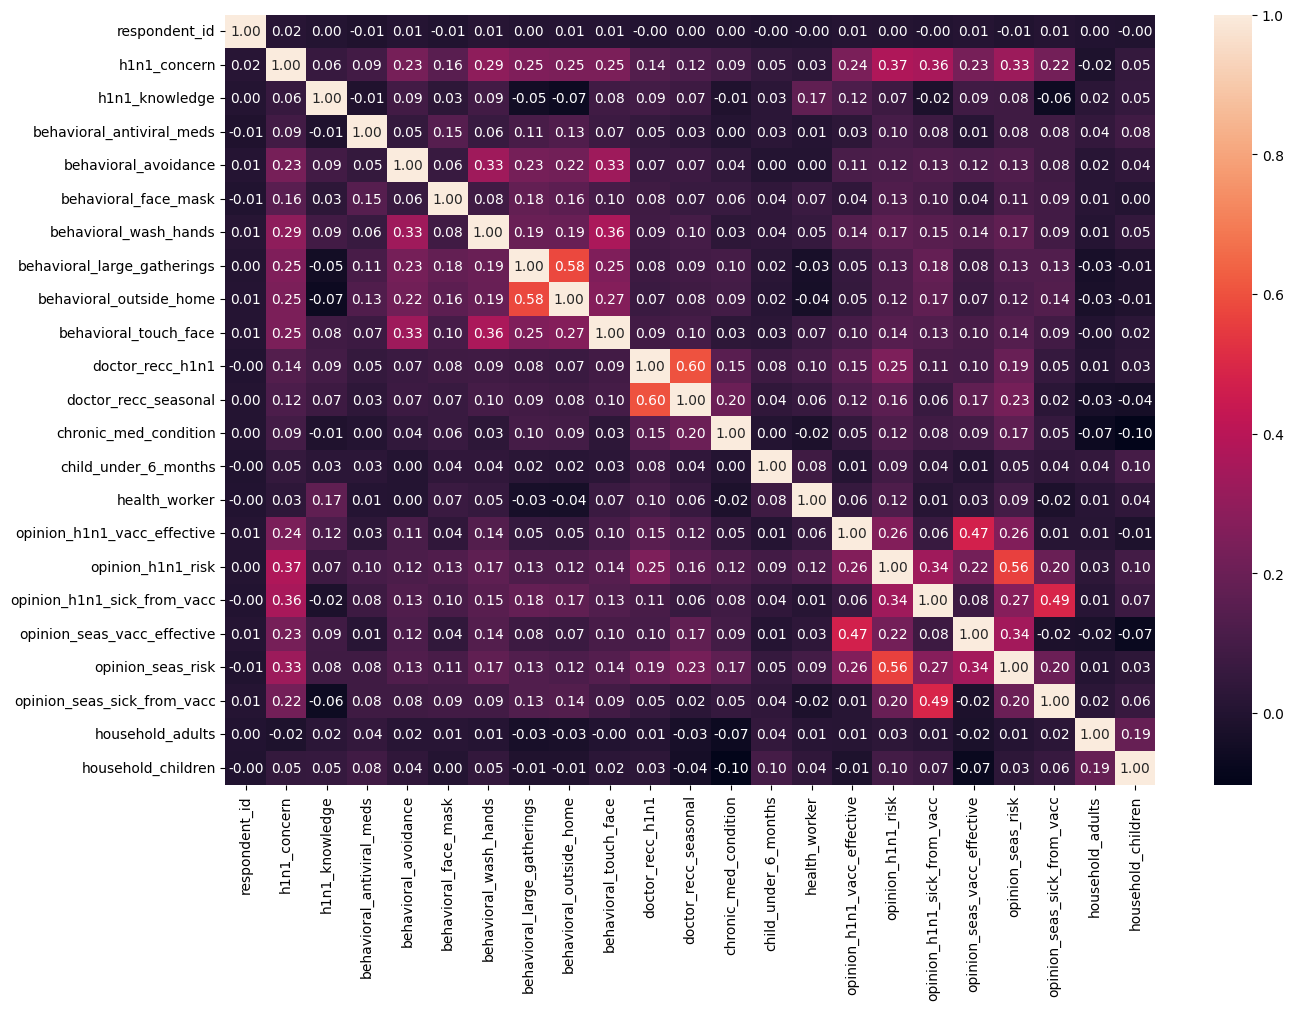

In [112]:
# potting heatmap to see correlation b.t numerical values
plt.figure(figsize=(15, 10))
sns.heatmap(training_set_feature.corr(),annot=True,fmt='.2f')
plt.show()

In [113]:
for col in numerical_set_feature:
    print(training_set_feature[col].value_counts())

0.0        1
17736.0    1
17812.0    1
17811.0    1
17810.0    1
          ..
8898.0     1
8897.0     1
8896.0     1
8895.0     1
26706.0    1
Name: respondent_id, Length: 26707, dtype: int64
2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64
1.0    14714
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64
0.0    25406
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64
1.0    19436
0.0     7271
Name: behavioral_avoidance, dtype: int64
0.0    24866
1.0     1841
Name: behavioral_face_mask, dtype: int64
1.0    22057
0.0     4650
Name: behavioral_wash_hands, dtype: int64
0.0    17160
1.0     9547
Name: behavioral_large_gatherings, dtype: int64
0.0    17726
1.0     8981
Name: behavioral_outside_home, dtype: int64
1.0    18129
0.0     8578
Name: behavioral_touch_face, dtype: int64
0.0    21299
1.0     5408
Name: doctor_recc_h1n1, dtype: int64
0.0    18613
1.0     8094
Name: doctor_recc_seasonal, dtype: int64
0.0    19417
1.0     7290
Name: c

In [114]:
for col in categorical_set_feature:
    print(training_set_feature[col].value_counts(),'\n')

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64 

College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64 

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64 

Female    15858
Male      10849
Name: sex, dtype: int64 

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64 

Married        14963
Not Married    11744
Name: marital_status, dtype: int64 

Own     20778
Rent     5929
Name: rent_or_own, dtype: int64 

Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64 

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lri

In [115]:
training_set_feature.drop(columns=['respondent_id'],inplace=True)
training_set_labels=pd.read_csv('training_set_labels.csv')
training_set_labels.drop(columns=['respondent_id'],inplace=True)

In [116]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Assuming X is your DataFrame
numerical_set_feature.remove('respondent_id')
# Apply StandardScaler to numerical features
scaler = StandardScaler()
training_set_feature[numerical_set_feature] = scaler.fit_transform(X[numerical_set_feature])

# Apply LabelEncoder to categorical features
encoder = LabelEncoder()
for feature in categorical_set_feature:
    training_set_feature[feature] = encoder.fit_transform(X[feature])


In [128]:
training_set_feature['opinion_h1n1_vacc_effective'].isnull().sum()

0

In [129]:
# applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
principal_components=pca.fit_transform(training_set_feature)
df_pca=pd.DataFrame(data=principal_components)

In [133]:
X=pd.DataFrame(data=df_pca)
Y=pd.DataFrame(data=training_set_labels)

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y['h1n1_vaccine'] )

In [144]:
from sklearn.multioutput import MultiOutputClassifier
import xgboost as xgb

model_XGB=xgb.XGBClassifier(n_jobs=-1,  silent=0,
   verbose=True,
                                            # eval_metric = ["auc","error"],
                                            objective='multi:softprob',
                                            # nclasses=2,
                                            num_class=2,
                                            learning_rate=0.05,
                                            colsample_bylevel=0.20,
                                            colsample_bynode=0.20,
                                            colsample_bytree=0.20,
                                            min_child_weight=5,
                                            max_depth=12,
                                            subsample=1,
                                            n_estimators=100)

model_v1=MultiOutputClassifier(model_XGB)

In [158]:
model_v1.fit(X_train,Y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=0.2,
                                              colsample_bynode=0.2,
                                              colsample_bytree=0.2, device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=12,
                                              max_leaves=None,
                                              min_child_weight=5, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_class=2,
                                              num_parallel_tree=None, ...))

In [148]:
predictions=model_v1.predict(X_test)

In [151]:
Y_test.shape

(8013, 2)

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 1.],
       [1., 1.],
       [0., 0.]])